In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking for any null values 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.shape

(301, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
print(df['Seller_Type'].value_counts())
print(df['Fuel_Type'].value_counts())
print(df['Owner'].value_counts())
print(df['Transmission'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [8]:
# car name is of no use therefore we can drop it 

df.drop(['Car_Name'],axis=1,inplace=True)

In [9]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
# Year feature is not directly usable but can convert it to age by substracting it with the current
# which will be a better choice

In [11]:
df['Current_year'] = 2022

In [12]:
df['Age_of_car'] = df['Current_year'] - df['Year']

In [13]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Age_of_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [14]:
# now we can drop "Year" and "Current_year from our dataset"
df.drop(['Year'],axis = 1 ,inplace = True)
df.drop(['Current_year'], axis = 1, inplace= True)

In [15]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [16]:
# manipulating the categorical features 

df = pd.get_dummies(df,drop_first=True)

In [17]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [18]:
# finding the corelation matrix
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age_of_car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [19]:
import seaborn as sns

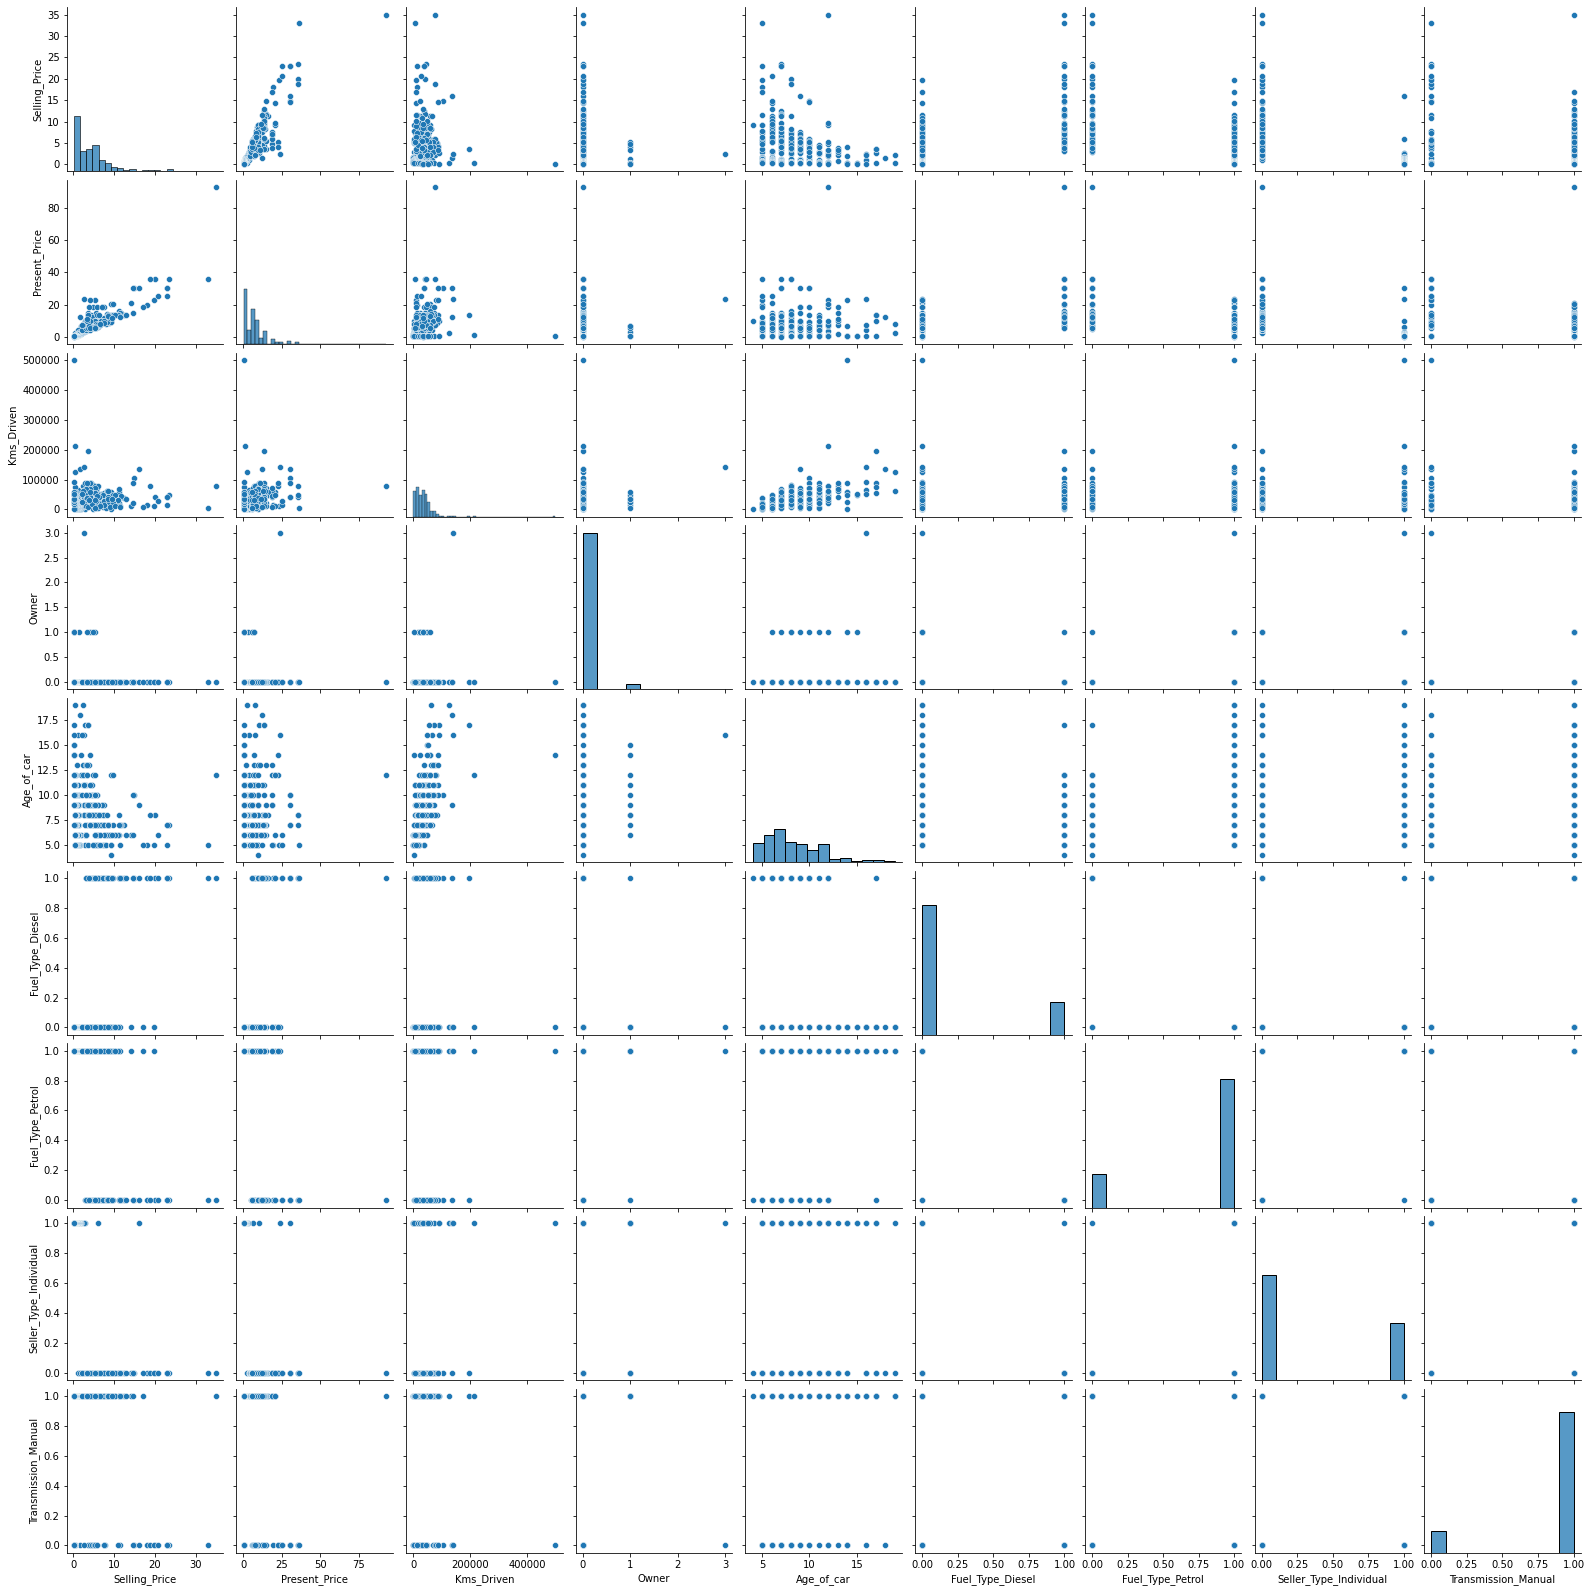

In [20]:
sns.pairplot(df)

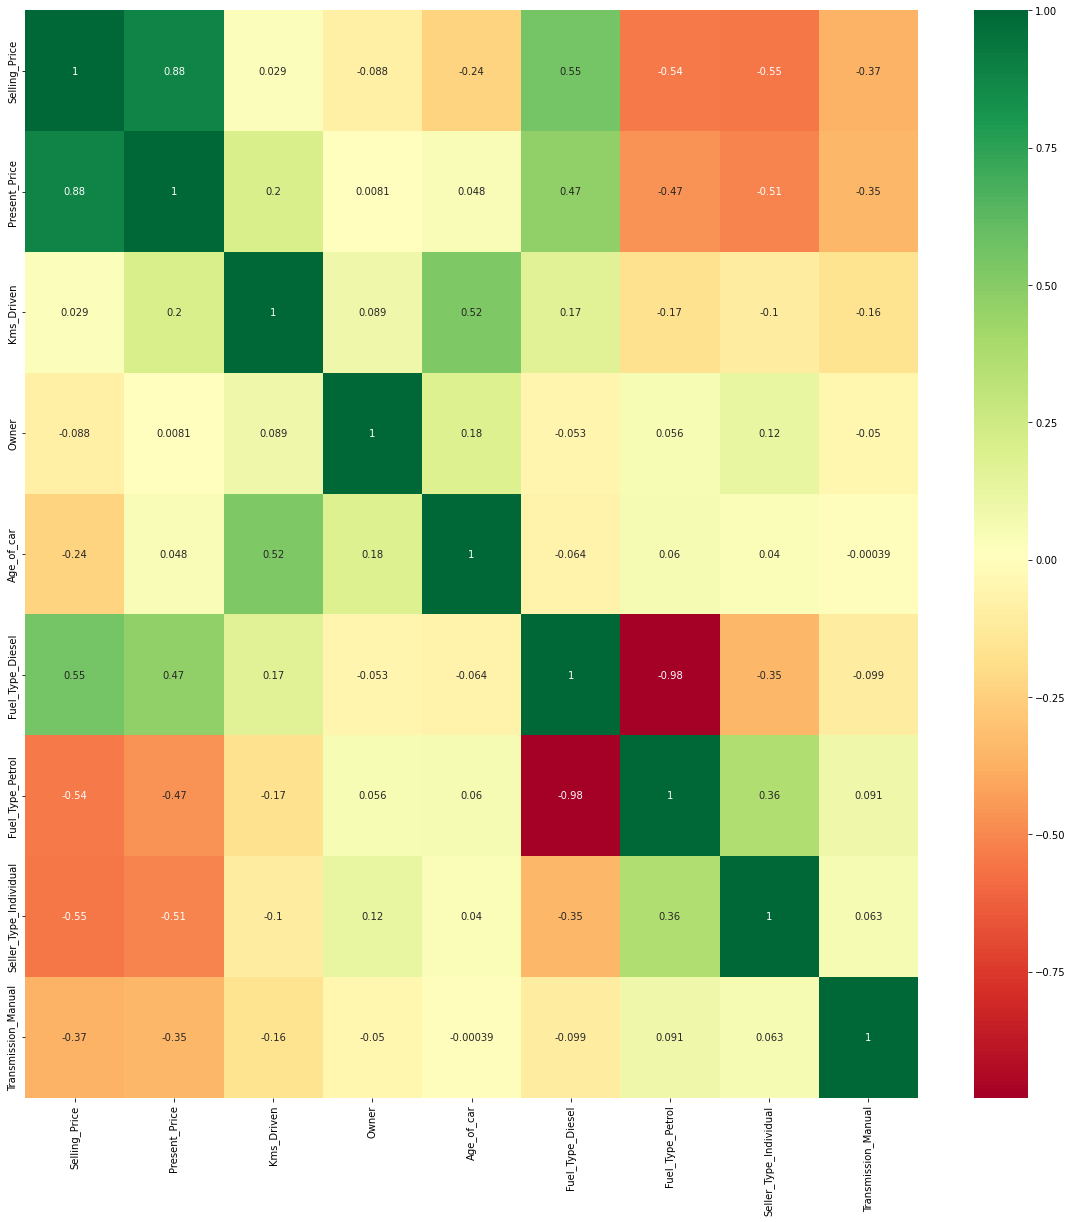

In [21]:
# The above pairplot is difficult to understand, instead we can use heatmap to better understand the corelation matrix
coormat = df.corr()
top_corr_feature = coormat.index
plt.figure(figsize=(20,20))

g = sns.heatmap(df[top_corr_feature].corr(),annot=True,cmap="RdYlGn")

In [22]:
# now seperate the data into "input data" and "Target data"

input_data = df.drop(['Selling_Price'],axis=1)
target = df['Selling_Price']

In [23]:
input_data.head()

,Present_Price,Kms_Driven,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [24]:
target.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [25]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(input_data,target)


ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.38449962 0.0396353  0.0009019  0.07919665 0.23014531 0.01198422
 0.1240708  0.1295662 ]


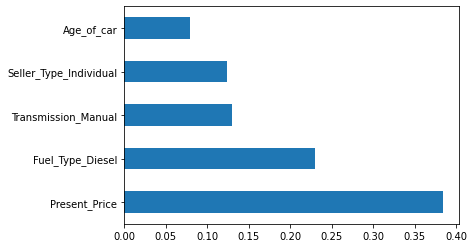

In [27]:
feature_importance = pd.Series(model.feature_importances_,index=input_data.columns)
feature_importance.nlargest().plot(kind = 'barh')
plt.show()

In [28]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(input_data,target,test_size=0.2)

In [29]:
from sklearn.linear_model import LinearRegression

classifire = LinearRegression()


In [30]:
from sklearn.model_selection import RandomizedSearchCV

fit_intercept = ['True','False']
copy_X = ['True','False']
positive = ['True','False']
# normalize = ['True','False']

In [31]:
random_grid= {
    'fit_intercept':fit_intercept,
    'copy_X' :copy_X,
    'positive':positive,
    
}
print(random_grid)

{'fit_intercept': ['True', 'False'], 'copy_X': ['True', 'False'], 'positive': ['True', 'False']}


In [32]:
rf_random = RandomizedSearchCV(estimator=classifire,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [33]:
rf_random.fit(input_data,target)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=False, positive=True; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=False, po

C:\Users\pchan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ...copy_X=False, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ...copy_X=False, fit_intercept=False, positive=True; total time=   0.0s
[CV] END ...copy_X=False, fit_intercept=False, positive=True; total time=   0.0s
[CV] END ...copy_X=False, fit_intercept=False, positive=True; total time=   0.0s
[CV] END ...copy_X=False, fit_intercept=False, positive=True; total time=   0.0s
[CV] END ...copy_X=False, fit_intercept=False, positive=True; total time=   0.0s
[CV] END ..copy_X=False, fit_intercept=False, positive=False; total time=   0.0s
[CV] END ..copy_X=False, fit_intercept=False, positive=False; total time=   0.0s
[CV] END ..copy_X=False, fit_intercept=False, positive=False; total time=   0.0s
[CV] END ..copy_X=False, fit_intercept=False, positive=False; total time=   0.0s
[CV] END ..copy_X=False, fit_intercept=False, positive=False; total time=   0.0s


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_jobs=1,
                   param_distributions={'copy_X': ['True', 'False'],
                                        'fit_intercept': ['True', 'False'],
                                        'positive': ['True', 'False']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [34]:
rf_random.best_params_

{'positive': 'True', 'fit_intercept': 'True', 'copy_X': 'True'}

In [35]:
rf_random.best_score_

-6.607249750083641

In [36]:
prediction = rf_random.predict(X_test)

C:\Users\pchan\AppData\Local\Temp\ipykernel_18096\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

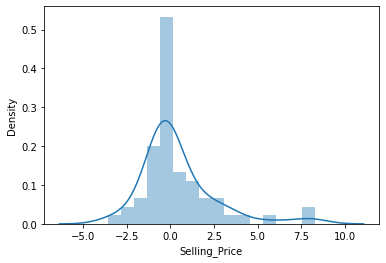

In [37]:
sns.distplot(y_test-prediction)

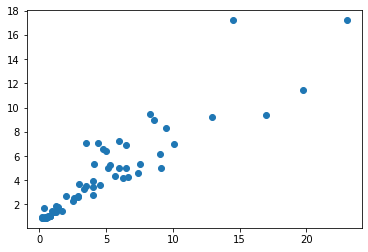

In [38]:
plt.scatter(y_test,prediction)

In [39]:
# calculating the accuracy and error of the model

from sklearn import metrics

print('Mean absolute error : ',metrics.mean_absolute_error(y_test,prediction))
print('Mean squared error : ',metrics.mean_squared_error(y_test,prediction))
print('Root mean squared error : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean absolute error :  1.3381793427103976
Mean squared error :  4.643690914080351
Root mean squared error :  2.1549224844713906


In [41]:
import pickle
# open a file, where you ant to store the data
file = open('linear_regression_model0.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)